Name: Tanaya Marta Desmanda ID Student:1101220029

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [3]:
ya = pd.read_csv("1.csv")
ya.head()

,0,1502,2215,2153,1
0,1.0,1667,2072,2047,1
1,2.0,1611,1957,1906,1
2,3.0,1601,1939,1831,1
3,4.0,1643,1965,1879,1
4,5.0,1604,1959,1921,1


In [4]:
print(ya.columns)

Index(['0', '1502', '2215', '2153', '1'], dtype='object')


In [5]:
ya = pd.read_csv("1.csv", header=None)
print(ya.head())
print(ya.iloc[:5])

     0     1     2     3  4
0  0.0  1502  2215  2153  1
1  1.0  1667  2072  2047  1
2  2.0  1611  1957  1906  1
3  3.0  1601  1939  1831  1
4  4.0  1643  1965  1879  1
     0     1     2     3  4
0  0.0  1502  2215  2153  1
1  1.0  1667  2072  2047  1
2  2.0  1611  1957  1906  1
3  3.0  1601  1939  1831  1
4  4.0  1643  1965  1879  1


In [6]:
ya = pd.read_csv("1.csv", header=None)

ya.columns = ['Time', 'Ax', 'Ay', 'Az', 'Activity']

print(ya.head())

   Time    Ax    Ay    Az  Activity
0   0.0  1502  2215  2153         1
1   1.0  1667  2072  2047         1
2   2.0  1611  1957  1906         1
3   3.0  1601  1939  1831         1
4   4.0  1643  1965  1879         1


In [7]:
ya['Am'] = np.sqrt(ya['Ax']**2 + ya['Ay']**2 + ya['Az']**2)
ya['Ax_low'] = ya['Ax'] - 100  # Contoh nilai untuk Ax_low
ya['Ax_high'] = ya['Ax'] + 100  # Contoh nilai untuk Ax_high
ya['Ay_low'] = ya['Ay'] - 100  # Contoh nilai untuk Ay_low
ya['Ay_high'] = ya['Ay'] + 100  # Contoh nilai untuk Ay_high
ya['Az_low'] = ya['Az'] - 100  # Contoh nilai untuk Az_low
ya['Az_high'] = ya['Az'] + 100  # Contoh nilai untuk Az_high
ya['Am_low'] = ya['Am'] - 100  # Contoh nilai untuk Am_low
ya['Am_high'] = ya['Am'] + 100  # Contoh nilai untuk Am_high

In [8]:
filtered_data = {activity: ya[ya['Activity'] == activity] for activity in ya['Activity'].unique()}

In [9]:
columns = ['Time', 'Ax', 'Ay', 'Az', 'Activity', 'Am', 
           'Ax_low', 'Ax_high', 'Ay_low', 'Ay_high', 
           'Az_low', 'Az_high', 'Am_low', 'Am_high']

for activity, df in filtered_data.items():
    print(f"Activity: {activity}")
    print(df[columns].head())

Activity: 1
   Time    Ax    Ay    Az  Activity           Am  Ax_low  Ax_high  Ay_low  \
0   0.0  1502  2215  2153         1  3434.768988    1402     1602    2115   
1   1.0  1667  2072  2047         1  3355.932359    1567     1767    1972   
2   2.0  1611  1957  1906         1  3171.435952    1511     1711    1857   
3   3.0  1601  1939  1831         1  3110.543843    1501     1701    1839   
4   4.0  1643  1965  1879         1  3176.683018    1543     1743    1865   

   Ay_high  Az_low  Az_high       Am_low      Am_high  
0     2315    2053     2253  3334.768988  3534.768988  
1     2172    1947     2147  3255.932359  3455.932359  
2     2057    1806     2006  3071.435952  3271.435952  
3     2039    1731     1931  3010.543843  3210.543843  
4     2065    1779     1979  3076.683018  3276.683018  
Activity: 2
          Time    Ax    Ay    Az  Activity           Am  Ax_low  Ax_high  \
33677  33677.0  1888  2374  2053         2  3662.680576    1788     1988   
33678  33678.0  1905  237

In [10]:
# Memisahkan data berdasarkan aktivitas
filtered_data = {activity: df for activity, df in ya.groupby('Activity')}

# Menyimpan daftar aktivitas
activities = sorted(filtered_data.keys())  # Atau list(xz['Activity'].unique()) kalau ingin urutan asli

# Mencetak hasil
print(f"Filtered Data Keys: {list(filtered_data)}")
print(f"Activities: {activities}")

Filtered Data Keys: [0, 1, 2, 3, 4, 5, 6, 7]
Activities: [0, 1, 2, 3, 4, 5, 6, 7]


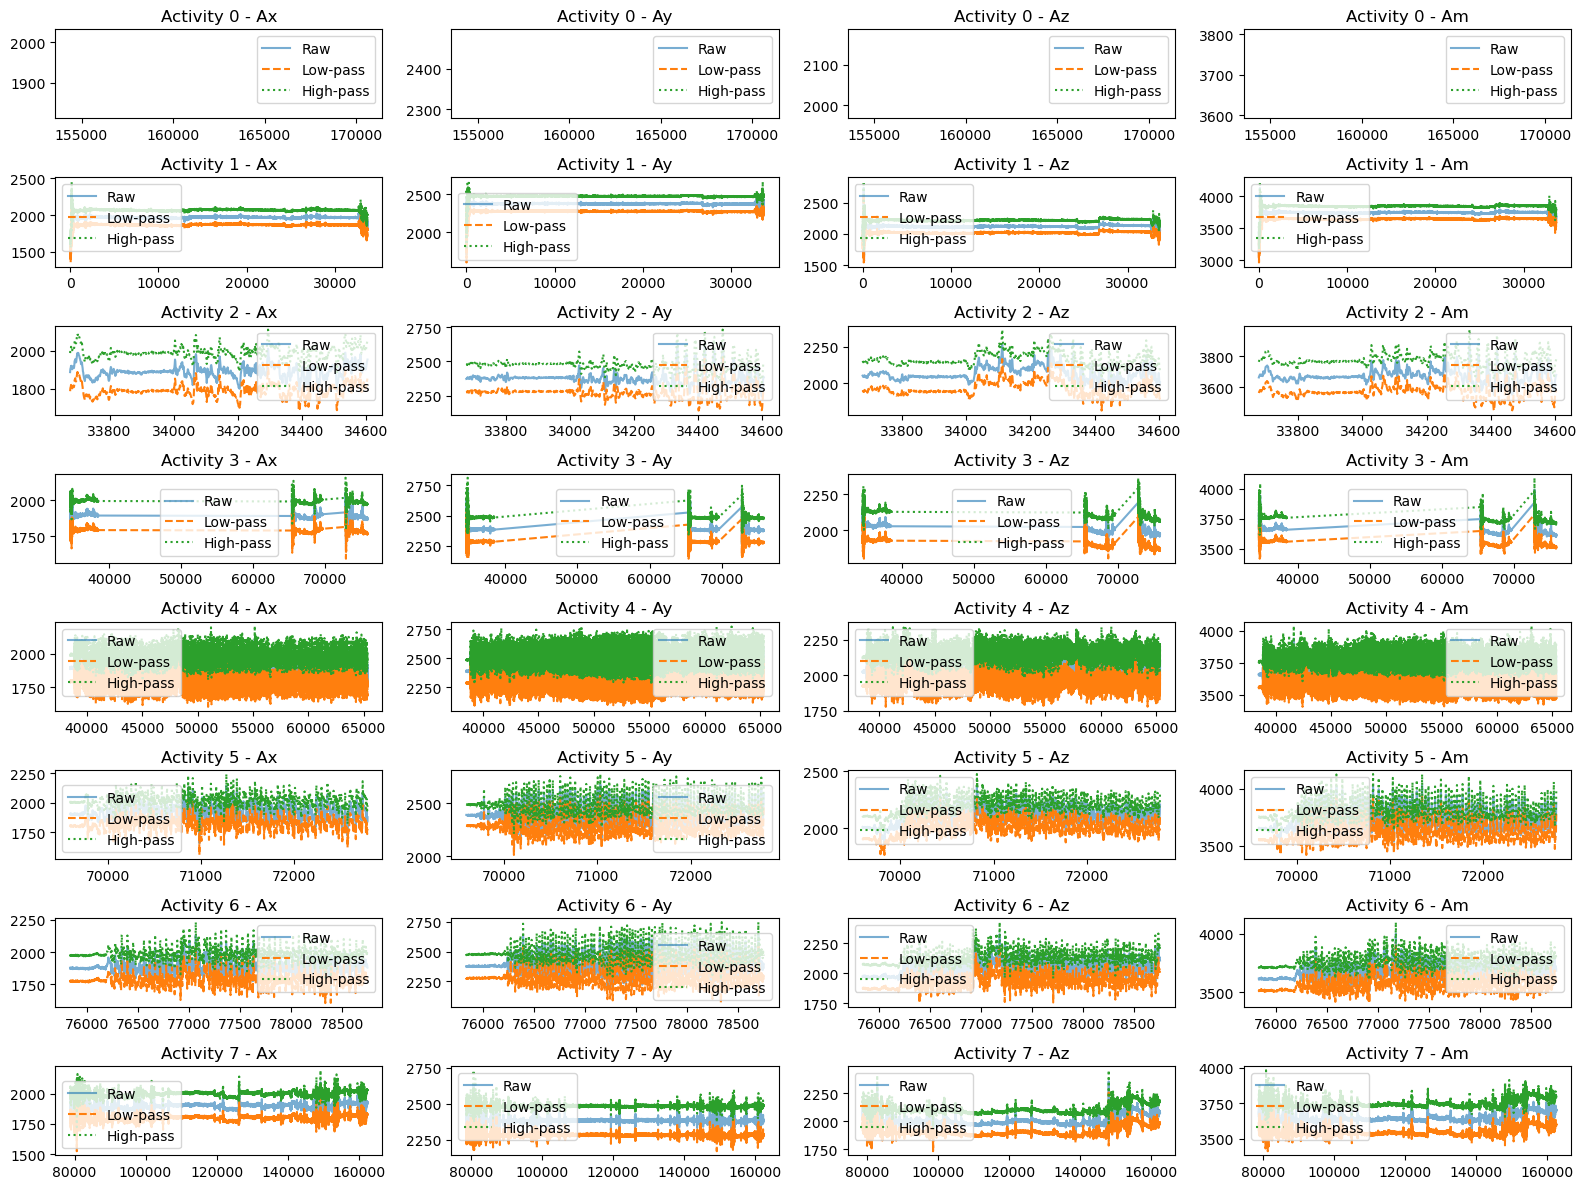

In [12]:
import matplotlib.pyplot as plt

# Menentukan jumlah baris dan kolom untuk subplots
fig, axes = plt.subplots(len(activities), 4, figsize=(16, 12), squeeze=False)

# Iterasi untuk setiap aktivitas
for i, activity in enumerate(activities):
    if activity in filtered_data:
        ry_act = filtered_data[activity]

        for j, axis in enumerate(['Ax', 'Ay', 'Az', 'Am']):
            ax = axes[i, j]

            if axis in ry_act.columns:
                # Plot data: Raw, Low-pass, dan High-pass
                ax.plot(ry_act.index, ry_act[axis], label='Raw', alpha=0.6)
                ax.plot(ry_act.index, ry_act[f'{axis}_low'], label='Low-pass', linestyle='dashed')
                ax.plot(ry_act.index, ry_act[f'{axis}_high'], label='High-pass', linestyle='dotted')
                
                ax.set_title(f'Activity {activity} - {axis}')
                ax.legend()
            else:
                print(f"Warning: Column {axis} not found in activity {activity}")
    else:
        print(f"Skipping Activity {activity} as it's not in filtered_data")

# Penataan layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()